# Exploratory Data Analysing Using Youtube Video Data from Indian Most Popular Entertainment Channels 

# 

## 1. Aims and Objectives

### In this project, I would like to explore the following:
    
   #### * Getting to know Youtube API and how to obtain video data.
   #### * Analyzing video data and verify different common "myths" about what makes a video do well on Youtube, for example:
   #### * Does the number of likes and comments matter for a video to get more views?
   #### * Does the video duration matter for views and interaction (likes/comments)?
   #### * Does title length matter for views?
   #### * How many tags do good performing videos have? What are the common tags among these videos?
   #### * Across all the creators I take into consideration, how often do they upload new videos? On which days in the week?
   #### * Explore the trending topics using NLP techniques
   #### * Which popular topics are being covered in the videos (e.g. using wordcloud for video titles?)
   #### * Which questions are being asked in the comment sections in the videos

## 2. Steps of the project

#### 1. Obtain video meta data via Youtube API for the top 10 indian entertaining channels(this includes several small steps: create a developer key, pull channel ids from their respective channels and transform the response into a usable data format)
#### 2. Preprocess data and engineer additional features for analysis
#### 3. Exploratory data analysis (EDA)
#### 4. Conclusion

## 3. Dataset

## Data Selection

#### As this project is perticulary focus on entertaining channels, Project which i followed perticularly created project on data scientist channels. 

#### I find this intresting to know which channel is performing well and what response they are getting from their viewers.

### Data limitation

#### The dataset is a real-world dataset and suitable for the research. However, the selection of the top 10 Youtube channels to include in the research is purely based on my knowledge of the channels in the data science field and might not be accurate. My definantion is "popular" is only based on subscriber count but there might be smaller channels also very intresting to look into, which will explore in the next youtube project.

## Ethics of data source
#### According to Youtube API's guide, the usage of Youtube API is free of charge given that your application send requests within a quota limit. The Youtube Data API user a quota to ensure that developers use the service as inteded and do not create applications that unfairly reduce service quality or limit access for others. The default quota allocation for each application is 10,000 unit per day, and you could request additional quota by completing a form to Youtube API Service if you reach the quota limit.

#### Since all data requested from Youtube API is public data (which everyone on the Internet can see on Youtube), there is no perticular privacy issues as far as I am concerned. In addition, the data is obtained only for research purposes in this case and not for any commercial interests.

In [2]:
# pip install isodate    # to convert the string into ISODate

In [1]:
import pandas as pd
import numpy as np
from dateutil import parser # This module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.
import isodate  # to convert the string into ISODate

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # The user defined function for formatting of the plot.
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Google API
from googleapiclient.discovery import build
from IPython.display import JSON

In [2]:
# NLP libraries
import nltk   # NLTK is a set of libraries for Natural Language Processing.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  #  to split a sentence into words
nltk.download("stopwords") 
nltk.download("punkt") # this has inbuilt function of splitting sentences into words
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data creation with Youtube API

#### I first created a project on Google Developers console, then requested an authorization credential(API key). Afterwards, I enabled Youtube API for my application, so that I can send API requests to Youtube API services. Then, I went on Youtube and checked the channel ID of each of the channels that I would like to include in my research score (using thier Channel Ids). Then I created the functions for getting the channel statistics via the API.

In [3]:
api_key = "Your API Key"

In [4]:
channel_ids = ["UCqwUrj10mAEsqezcItqvwEw",  
               "UCt4atlExw8aj3Bm79nv1fig",
               "UCPT_VSXy7i0oz20p7iMHWYQ",
               "UC_vcKmg67vjMP7ciLnSxSHQ",
               "UCkS7Vxu4PjM99w0Is6idjcg" ,
               "UCj22tfcQrWG7EMEKS0qLeEg" ,
               "UCOhHO2ICt0ti9KAh-QHvttQ",
               "UCfLuT3JwLx8rvHjHfTymekw",
               "UCjvgGbPPn-FgYeguc5nxG4A",
               "UCNSdjX4ry9fICqeObdZPAZQ",
              ] 



#### Google api can return max only 6 channel details in one call. However to analyze each channel thoroughly i am taking each channel seperatly by commenting other channels.

In [5]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)



In [6]:
def get_channel_stats(youtube, channel_ids):
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id= ','.join(channel_ids)
    )
    response = request.execute()
    
    # loop through items
    for item in response['items']:
        data = {"channelName" : item["snippet"]["title"],
               "subscribers": item["statistics"]["subscriberCount"],
               "views": item["statistics"]["viewCount"],
               "totalVideos": item["statistics"]["videoCount"],
               "playlistID": item["contentDetails"]["relatedPlaylists"]["uploads"]
               
        }
        
        all_data.append(data)
        
    return(pd.DataFrame(all_data))

In [7]:
channel_stats = get_channel_stats(youtube, channel_ids)

## Channel Statistics

#### Using the get_channel_stats function defined below, now we are going to obtain the channel statistics for the 10 channels in scope.

In [8]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistID
0,Triggered Insaan,15100000,2328556770,251,UUfLuT3JwLx8rvHjHfTymekw
1,CarryMinati,34700000,2783076139,178,UUj22tfcQrWG7EMEKS0qLeEg
2,Amit Bhadana,23800000,2231135037,96,UU_vcKmg67vjMP7ciLnSxSHQ
3,BB Ki Vines,25100000,4149021384,182,UUqwUrj10mAEsqezcItqvwEw
4,Technical Guruji,22000000,2938005815,4286,UUOhHO2ICt0ti9KAh-QHvttQ
5,Flying Beast,7220000,2701338517,1021,UUNSdjX4ry9fICqeObdZPAZQ
6,Zakir Khan,6920000,578623578,101,UUkS7Vxu4PjM99w0Is6idjcg
7,Sourav Joshi Vlogs,12800000,4054866051,866,UUjvgGbPPn-FgYeguc5nxG4A
8,Round2hell,25000000,2644262345,67,UUt4atlExw8aj3Bm79nv1fig
9,Anmol Sachar,1020000,90495145,163,UUPT_VSXy7i0oz20p7iMHWYQ


In [9]:
playlist_id = "UUqwUrj10mAEsqezcItqvwEw"    # BB Ki Vines

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part = "snippet, contentDetails",
        playlistId = playlist_id,
        maxResults = 50
        
    )
    response = request.execute()
    
    for item in response["items"]:
        video_ids.append(item["contentDetails"]["videoId"])
        
    next_page_token = response.get("nextPageToken")
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part = "snippet, contentDetails",
            playlistId = playlist_id,
            maxResults = 50,
            pageToken = next_page_token)
        response = request.execute()
        
        for item in response["items"]:
            video_ids.append(item["contentDetails"]["videoId"])
        
        next_page_token = response.get("nextPageToken")
        
    return video_ids

In [10]:
video_ids = get_video_ids(youtube, playlist_id)

In [11]:
len(video_ids)

182

In [12]:
def get_video_details(youtube, video_ids):
    
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        requests = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=','.join(video_ids[i:i+50])
        )
        response = requests.execute()
        
        for video in response["items"]:
            stats_to_keep = {"snippet": ["channelTitle", "title", "description", "tags", "publishedAt"],
                             "statistics": ["viewCount", "likeCount", "favouriteCount", "commentCount"],
                             "contentDetails": ["duration", "defination", "caption"]
                            }
            video_info = {}
            video_info["video_id"] = video["id"]
            
            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None
                        
            all_video_info.append(video_info)
            
    return pd.DataFrame(all_video_info)

In [13]:
video_df = get_video_details(youtube, video_ids)

In [14]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,defination,caption
0,WEExPj6CMss,BB Ki Vines,Dhindora | Saazish | Offical Lyrical Video | B...,Binge watch Dhindora: https://youtube.com/play...,"[Saazish, Bhuvan Bam, Romantic Song, Rekha Bha...",2021-12-16T08:30:04Z,10954655,1095653,None,31443,PT4M7S,None,false
1,l8zlKap1JEo,BB Ki Vines,Dhindora | Official Music Video | BB Ki Vines,Binge watch Dhindora: https://youtube.com/play...,"[Bhuvan Bam, Dhindora, BB Ki Vines, Carryminat...",2021-12-09T08:30:25Z,45587442,4015574,None,178645,PT4M11S,None,true
2,TjyHk-4OHI4,BB Ki Vines,Dhindora | EP 08: Samay Ka Pahiya | BB Ki Vine...,Acha laga? Rate this episode on IMDb: https://...,None,2021-12-02T08:30:11Z,30888838,2671967,None,163889,PT17M28S,None,true
3,HHQ68FnjAvY,BB Ki Vines,Dhindora | EP 07: Toota Ek Taara | BB Ki Vines,Acha laga? Rate this episode on IMDb: https://...,"[dhindora, ep7, ep07, bhuvan bam, bb ki vines,...",2021-11-25T08:30:08Z,33703589,2840296,None,207721,PT21M14S,None,true
4,A0wcdnzzyIE,BB Ki Vines,Dhindora | EP 06: DTYDHTB | BB Ki Vines,Acha laga? Rate this episode on IMDb: https://...,"[DTYDHTB, dhindora, ep6, ep06, bb ki vines, bh...",2021-11-18T08:30:08Z,32767416,2587778,None,181635,PT16M11S,None,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,ydSWOCDxnKM,BB Ki Vines,Raaste Mei Hu! | Jhoota Dost Late Lateef | BB ...,There is always that one friend who can never ...,"[late, friend, laugh, joke, Funny, Comedy, Hum...",2015-06-20T09:14:59Z,4512743,285489,None,1424,PT29S,None,true
178,R0F3YgtpuUM,BB Ki Vines,BB Ki Vines- | Abusing in front of parents |,How awkward does it get when you accidently ab...,"[Parent (Literature Subject), funny, laugh, jo...",2015-06-20T09:12:54Z,6243785,389052,None,2474,PT48S,None,true
179,szAK0m20fVw,BB Ki Vines,Kutiya Khafa Saand Bewafa | Gaur Se Dekhiye | ...,International Vs Desi Reporters\nPresenting: '...,"[news, parody, reporter, vines, funny, comedy,...",2015-06-20T09:12:51Z,6033701,316314,None,2260,PT45S,None,false
180,i-Kr0aZBJC8,BB Ki Vines,Bittu Ki Lottery Lagi Hai | Chori Mein Twist |...,What happens when BB's house gets broken into?...,"[vines, funny, bb, comedy, Humor, Laugh, Jonas...",2015-06-20T09:02:57Z,8471697,433738,None,3157,PT44S,None,false


In [15]:
def get_comments_in_videos(youtube, video_ids):
    all_comments = []
    
    for video_id in video_ids:
        try:
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
            
            comments_in_video = [comment["snippet"]["topLevelComment"]["snippet"]["textOriginal"] for comment in response["items"][0:10]]
            comments_in_video_info = {"video_id": video_id, "comments":  comments_in_video}
            
            all_comments.append(comments_in_video_info)
            
        except:
            print("Could not get comments for video" + video_id)
        
    return pd.DataFrame(all_comments)

In [16]:
comments_df = get_comments_in_videos(youtube, video_ids)

In [17]:
comments_df

,video_id,comments
0,WEExPj6CMss,[Gaana pasand aaya toh LIKE kar dena. \nCommen...
1,l8zlKap1JEo,[Video available in 4K !! Enjoy! \nShare it wi...
2,TjyHk-4OHI4,"[Danveer bano, lete toh sab hain! ☺️\nDrop a L..."
3,HHQ68FnjAvY,[Mera favourite episode! So many emotions! And...
4,A0wcdnzzyIE,[Yeh kya kar diya Babloo ji ne?? 😨😨 \nIss epis...
...,...,...
177,ydSWOCDxnKM,"[Legends are watching in 2022, Legend's are wa..."
178,R0F3YgtpuUM,"[Shaktimaan is back, lmao i saidbsdk to my bro..."
179,szAK0m20fVw,"[Recommend after 6 years, Who is watching in 2..."
180,i-Kr0aZBJC8,"[Now you tube is an advertising app 😔, BB made..."


In [18]:
comments_df["comments"][0]

['Gaana pasand aaya toh LIKE kar dena. \nComment karke favourite part bataao♥️\n\nKeep Sharing, Keep Loving!',
 'I found this channel randomly; it is really a channel that produces quality content. Congratulations.',
 'I found this channel randomly; it is really a channel that produces quality content. Congratulations.',
 'This is my favourite channel. I especially like it when you explain everything so nicely. I wish you a lot of success with the channel and happy life.',
 'I found this channel randomly; it is really a channel that produces quality content. Congratulations.',
 '✌️✌️💕💕💕💕😊😊😊',
 'We want bb back 😐',
 'Masat ❤❤❤',
 'Mashaallah Love from Kashmir ❤️❤️❤️',
 'Bhai viedo kyu nahi bana raha ho']

## Get channel Statistics

In [19]:
channel_data = get_channel_stats(youtube, channel_ids)
channel_data

,channelName,subscribers,views,totalVideos,playlistID
0,Technical Guruji,22000000,2938005815,4286,UUOhHO2ICt0ti9KAh-QHvttQ
1,BB Ki Vines,25100000,4149021384,182,UUqwUrj10mAEsqezcItqvwEw
2,Amit Bhadana,23800000,2231135037,96,UU_vcKmg67vjMP7ciLnSxSHQ
3,Flying Beast,7220000,2701338517,1021,UUNSdjX4ry9fICqeObdZPAZQ
4,Anmol Sachar,1020000,90495145,163,UUPT_VSXy7i0oz20p7iMHWYQ
5,Triggered Insaan,15100000,2328556770,251,UUfLuT3JwLx8rvHjHfTymekw
6,Zakir Khan,6920000,578623578,101,UUkS7Vxu4PjM99w0Is6idjcg
7,CarryMinati,34700000,2783076139,178,UUj22tfcQrWG7EMEKS0qLeEg
8,Sourav Joshi Vlogs,12800000,4054866051,866,UUjvgGbPPn-FgYeguc5nxG4A
9,Round2hell,25000000,2644262345,67,UUt4atlExw8aj3Bm79nv1fig


#### Channel_data is currently in string format, so I will convert them into numerric so that we can visualize and do numerics oeprations on them

In [20]:
# convert count columns to numeric columns
numeric_cols = ["subscribers", "views", "totalVideos"]
channel_data[numeric_cols] = channel_data[numeric_cols].apply(pd.to_numeric, errors="coerce")

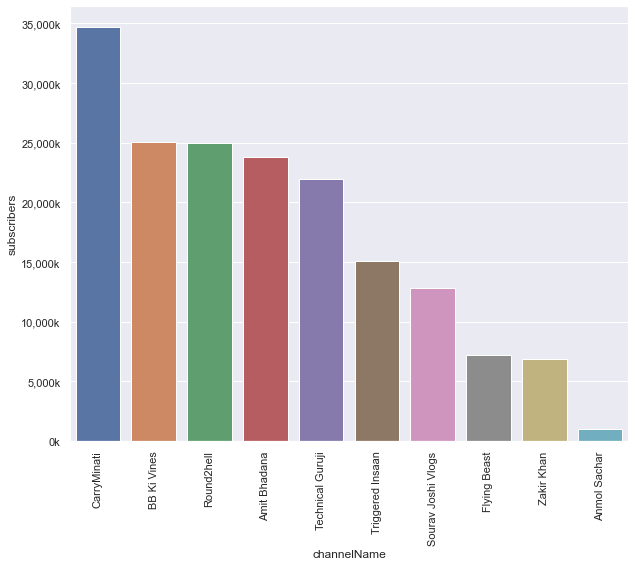

In [21]:
# Number of subscriber per channel in descending order

sns.set(rc={"figure.figsize":(10,8)})
ax = sns.barplot(x="channelName", y="subscribers", data=channel_data.sort_values("subscribers", ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x/1000) + "k"))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


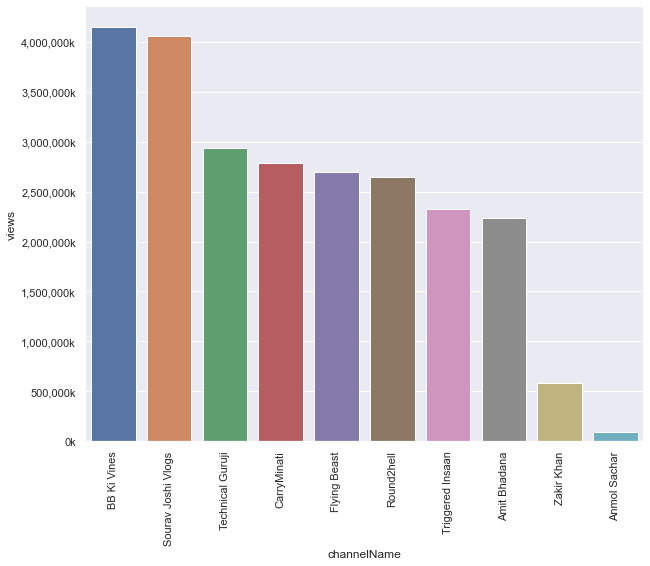

In [22]:
# Print Number of views per channel in descending order 

ax = sns.barplot(x="channelName", y="views", data=channel_data.sort_values("views", ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x/1000) + "k"))
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

## Get video statistics for the channel

In [23]:
# create a dataframe with video statistics and commment from channel

video_df = pd.DataFrame()
comments_df = pd.DataFrame()

for c in channel_data["channelName"].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_data.loc[channel_data["channelName"]== c, "playlistID"].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)
    
    # get video data
    video_data = get_video_details(youtube, video_ids)
    #get comment data
    comments_data = get_comments_in_videos(youtube, video_ids)
    
    # append video data together and comment data together
    video_df = video_df.append(video_data, ignore_index=True)
    comments_df = comments_df.append(comments_data, ignore_index=True)

Getting video information from channel: Technical Guruji
Getting video information from channel: BB Ki Vines
Getting video information from channel: Amit Bhadana
Getting video information from channel: Flying Beast
Getting video information from channel: Anmol Sachar
Getting video information from channel: Triggered Insaan
Could not get comments for videoEEFM5oXZiYo
Could not get comments for videoGqMCJGsFZrE
Could not get comments for videoRETlCtm6lZM
Could not get comments for video4JeN54mSga4
Could not get comments for videofdbWf2s134k
Getting video information from channel: Zakir Khan
Getting video information from channel: CarryMinati
Could not get comments for videoA8OHfGKq6RM
Getting video information from channel: Sourav Joshi Vlogs
Getting video information from channel: Round2hell


In [24]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,defination,caption
0,HSDd1VVem9E,Technical Guruji,Realme 9 Pro+ Unboxing & First Look - The Ulti...,"Namaskaar Dosto, is video mein maine aapse baa...","[realme 9 Pro+ First Look, realme 9 Pro+, real...",2022-02-16T09:45:07Z,12417,2173,None,433,PT8M1S,None,false
1,SG5xi_K_oJc,Technical Guruji,Poco M4 Pro 5G Unboxing & First Look - The Reb...,"Namaskaar Dosto, is video mein maine aapse Poc...","[Poco M4 Pro 5G, poco, Poco M4 Pro 5G unboxing...",2022-02-16T05:18:18Z,106397,14740,None,870,PT6M49S,None,false
2,RyTrRAzhXIQ,Technical Guruji,"Tech Talks #1679 - Free Fire Available, BGMI H...",TG Shorts: https://www.youtube.com/channel/UCs...,"[Free Fire Available, BGMI Huge Update, Poco M...",2022-02-15T18:50:10Z,75567,8902,None,844,PT9M48S,None,false
3,mKo10-phNN8,Technical Guruji,Asus ROG 5S Unboxing & First Look - The Ultima...,"Namaskaar Dosto, is video mein maine aapse Asu...","[asus ROG Phone 5s, asus ROG Phone 5s unboxing...",2022-02-15T06:35:36Z,234054,21726,None,1005,PT8M9S,None,false
4,5KuQBCW81YM,Technical Guruji,"Tech Talks #1678 - Free Fire Ban in India, Jio...",TG Shorts: https://www.youtube.com/channel/UCs...,"[Free Fire Ban in India, Jio Satellite Interne...",2022-02-14T14:09:32Z,122469,12595,None,1398,PT6M45S,None,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,qJMxHxWNmc4,Round2hell,Happy New Year 2017 | Round2hell | R2H,Warning : USE EARPHONE BEFORE WATCHING IT.\nwi...,"[happy, new, year, happy new year, 2017, happy...",2017-01-01T08:18:13Z,4547763,178585,None,2288,PT3M9S,None,false
7206,_65i8jKJy0o,Round2hell,Never trust your best friend | Round2hell | R2H,This vine is actually for those kameene freind...,"[RANGEROVER, RANGE, ROVER, RANGE ROVER, SWIFT,...",2016-12-26T06:48:47Z,10102166,380520,None,3650,PT2M36S,None,false
7207,Z4vjsmVAtrc,Round2hell,When you got a new DSLR | Round2hell | R2H,This is another vine from round2hell .\nthis i...,"[dslr, slr, slr camera, dslr camera, photograp...",2016-12-17T09:52:13Z,4391510,231096,None,1751,PT1M45S,None,false
7208,Q75GPZfFU4k,Round2hell,Pagli caption troll Part-2 | Round2hell | R2H,"""Pagli"" caption, status etc. social sites pr d...","[pagli, caption of facebook, pagli status, hum...",2016-11-20T14:19:03Z,5805188,268830,None,3136,PT2M55S,None,false


In [25]:
# Print views comments
comments_df

,video_id,comments
0,HSDd1VVem9E,"[Jaldi se LIKE aur SHARE kardo #TGFamily!!!, M..."
1,SG5xi_K_oJc,"[Jaldi se LIKE aur SHARE kardo #TGFamily!!!, C..."
2,RyTrRAzhXIQ,"[Jaldi se LIKE aur SHARE kardo #TGFamily!!!, 👍..."
3,mKo10-phNN8,"[Jaldi se LIKE aur SHARE kardo #TGFamily!!!, G..."
4,5KuQBCW81YM,"[Jaldi se LIKE aur SHARE kardo #TGFamily!!!, F..."
...,...,...
7199,qJMxHxWNmc4,"[Legend watching it after 5 years 😂❤, Legend h..."
7200,_65i8jKJy0o,"[Gaon ki Range Rover, OP, 5 year, Legend watch..."
7201,Z4vjsmVAtrc,[i love u brothers mai bhoot hsaa hu ess video...
7202,Q75GPZfFU4k,"[In 2022, To bhai kon kon ye vedio 2022 me dek..."


In [26]:
# write video data to CSV file for future references
video_df.to_csv("video_data_allentertainment_channels.csv")
comments_df.to_csv("comments_data_allentertainment_channels.csv")

In [27]:
# check for empty values
video_df.isnull().sum()

video_id             0
channelTitle         0
title                0
description          0
tags               169
publishedAt          0
viewCount            0
likeCount            1
favouriteCount    7210
commentCount         6
duration             0
defination        7210
caption              0
dtype: int64

In [28]:
video_df.publishedAt.sort_values().value_counts()

2018-08-24T01:49:29Z    2
2020-12-27T13:32:55Z    2
2016-01-24T08:59:57Z    2
2019-01-02T15:00:05Z    2
2019-07-28T16:13:46Z    2
                       ..
2018-08-10T03:46:13Z    1
2018-01-07T10:22:15Z    1
2018-10-16T14:00:14Z    1
2020-11-29T02:30:01Z    1
2019-05-27T07:14:45Z    1
Name: publishedAt, Length: 7195, dtype: int64

In [29]:
cols = ["viewCount", "likeCount", "favouriteCount", "commentCount",]
video_df[cols] = video_df[cols].apply(pd.to_numeric, errors= "coerce", axis = 1)

In [30]:
# Create publish day (in the week) column
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [31]:
# convert duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [32]:
# Add number of tags
video_df["tagsCount"] = video_df["tags"].apply(lambda x: 0 if x is None else len(x))

In [33]:
# comments and likes per 1000 views ratio
video_df["likeRatio"] = video_df["likeCount"]/video_df["viewCount"]* 1000
video_df["commentRatio"] = video_df["commentCount"]/ video_df["viewCount"] * 1000

In [34]:
# title character length
video_df["titlelength"] = video_df["title"].apply(lambda x: len(x))

In [35]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,defination,caption,publishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titlelength
0,HSDd1VVem9E,Technical Guruji,Realme 9 Pro+ Unboxing & First Look - The Ulti...,"Namaskaar Dosto, is video mein maine aapse baa...","[realme 9 Pro+ First Look, realme 9 Pro+, real...",2022-02-16 09:45:07+00:00,12417.0,2173.0,NaN,433.0,PT8M1S,None,false,Wednesday,481.0,22,175.002013,34.871547,69
1,SG5xi_K_oJc,Technical Guruji,Poco M4 Pro 5G Unboxing & First Look - The Reb...,"Namaskaar Dosto, is video mein maine aapse Poc...","[Poco M4 Pro 5G, poco, Poco M4 Pro 5G unboxing...",2022-02-16 05:18:18+00:00,106397.0,14740.0,NaN,870.0,PT6M49S,None,false,Wednesday,409.0,36,138.537741,8.176922,73
2,RyTrRAzhXIQ,Technical Guruji,"Tech Talks #1679 - Free Fire Available, BGMI H...",TG Shorts: https://www.youtube.com/channel/UCs...,"[Free Fire Available, BGMI Huge Update, Poco M...",2022-02-15 18:50:10+00:00,75567.0,8902.0,NaN,844.0,PT9M48S,None,false,Tuesday,588.0,38,117.802745,11.168896,98
3,mKo10-phNN8,Technical Guruji,Asus ROG 5S Unboxing & First Look - The Ultima...,"Namaskaar Dosto, is video mein maine aapse Asu...","[asus ROG Phone 5s, asus ROG Phone 5s unboxing...",2022-02-15 06:35:36+00:00,234054.0,21726.0,NaN,1005.0,PT8M9S,None,false,Tuesday,489.0,37,92.824733,4.293881,70
4,5KuQBCW81YM,Technical Guruji,"Tech Talks #1678 - Free Fire Ban in India, Jio...",TG Shorts: https://www.youtube.com/channel/UCs...,"[Free Fire Ban in India, Jio Satellite Interne...",2022-02-14 14:09:32+00:00,122469.0,12595.0,NaN,1398.0,PT6M45S,None,false,Monday,405.0,39,102.842352,11.415134,100


## Exploratory analysis

### Views distribution per channel
##### With the video statistics for all channel, now we can see how the views are distributed per channel. Some channels might have a lot of views on one of their videos and the rest do not receive any views. Other channels might have more evenly distribution views per video. Some channels suggesting that they have few viral videos. views are more consistent across videos in some channels or the others.

C:\Users\vishw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


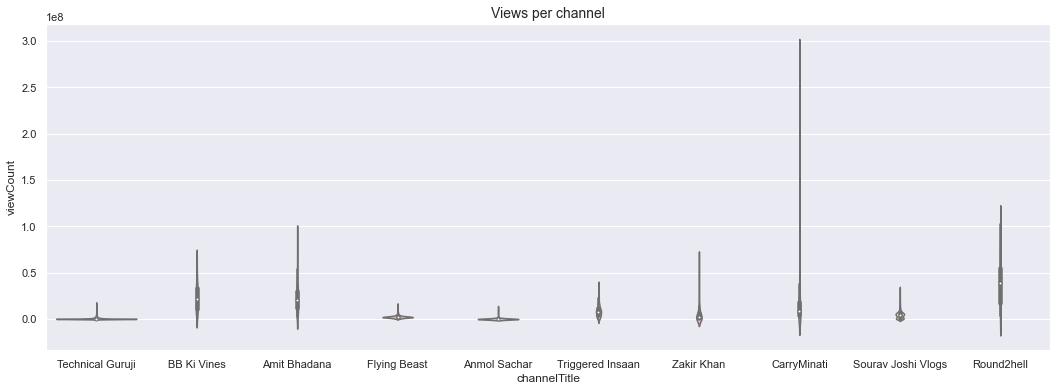

In [36]:
plt.rcParams["figure.figsize"] = (18,6)
sns.violinplot(video_df["channelTitle"], video_df["viewCount"], palette = "pastel")
plt.title("Views per channel", fontsize = 14)
plt.show()

## Does the number of likes and comments matterr for a video to get more views?
#### Firstly, I would like to check if comments and likes do correlate with how many views a video would get. In the plot below, it can be observed that the numeber of views and numbers of comments/ like strongly correlated with each other. The number of likes seems to suggest stronger correlation than the number of comments. However, this is expected as the more people watching a video, the more likely this video will get comments and likes. To correct for this factor, we will plot these relationships again using the comments per 1000 views and likes per 1000 view ratios.

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

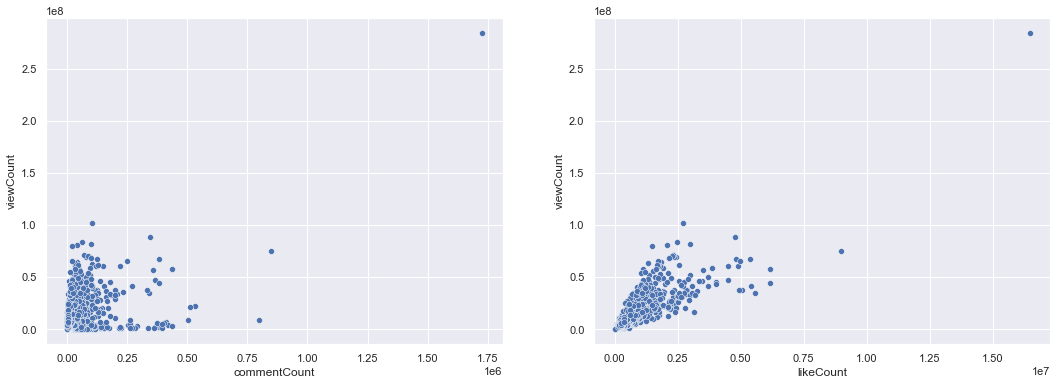

In [37]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[1])

<AxesSubplot:xlabel='likeRatio', ylabel='viewCount'>

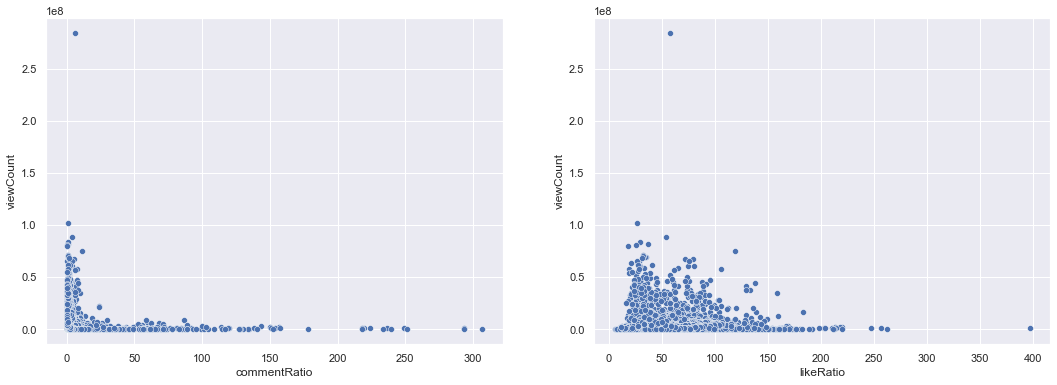

In [38]:
fig, ax= plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeRatio", y = "viewCount", ax=ax[1])

#### After correcting for the absolute number of views, it turns out that the correlation is much less clear. The comment-view relationship seems to completely disappear: a lot of videos have millions of views and very few comments, while some videos have very few views have betterr interaction. However, it it understandable that comments take more efforts than views and likes, and normally comments would die off when the video gets older.

#### As for like-view relationship, we can still see some positive correlation between views and like ratio( though very subtle), which means that the more views a video has, the more people would hit the like button. This seems to support the idea of social proof, which means that people tend to like better the products that are already liked by many other people.

## Does the video duration matter for views and interaction (likes/comments)
#### As can be seen in the histogram below, most videos are between 300 and 1200 seconds, which is about 5 to 20 minutes. Here I had to limit the duration to 10,000 because of some really long videos (potentially streaming videos).

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

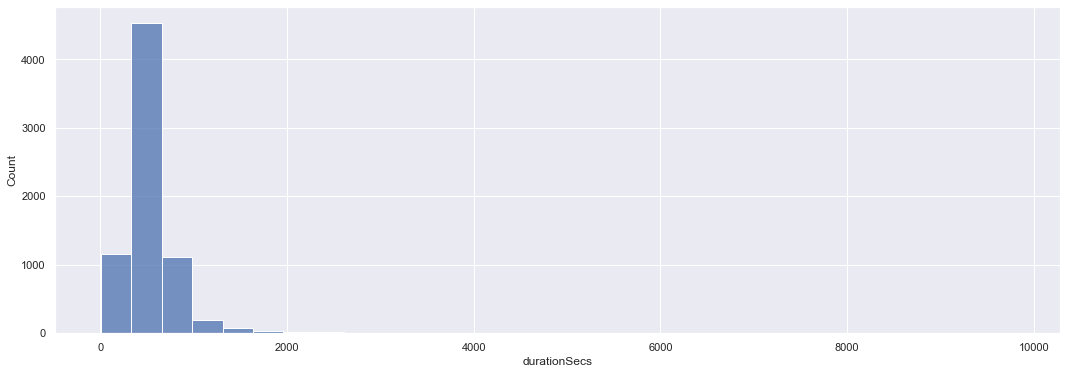

In [39]:
sns.histplot(data=video_df[video_df["durationSecs"] < 10000], x="durationSecs", bins=30)

#### Now we plot the duration against comment count and like count. It can be seen that actually shorter videos tend to get more likes and comments than very long videos.

<AxesSubplot:xlabel='durationSecs', ylabel='likeCount'>

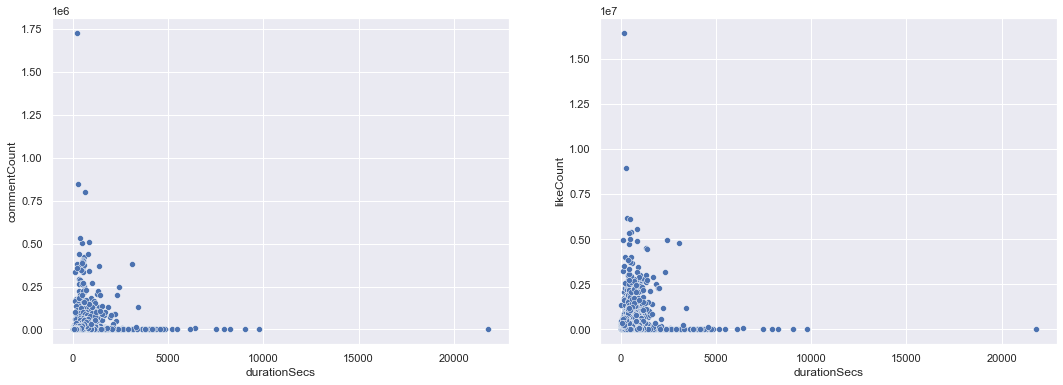

In [40]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "durationSecs", y = "commentCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "durationSecs", y = "likeCount", ax=ax[1])

## Does title length matter for views?
#### There is no clear relationship between title length and views as seen the scatterplot below, but most-viewed videos tend to have average title length of 30-70 characters.

<AxesSubplot:xlabel='titlelength', ylabel='viewCount'>

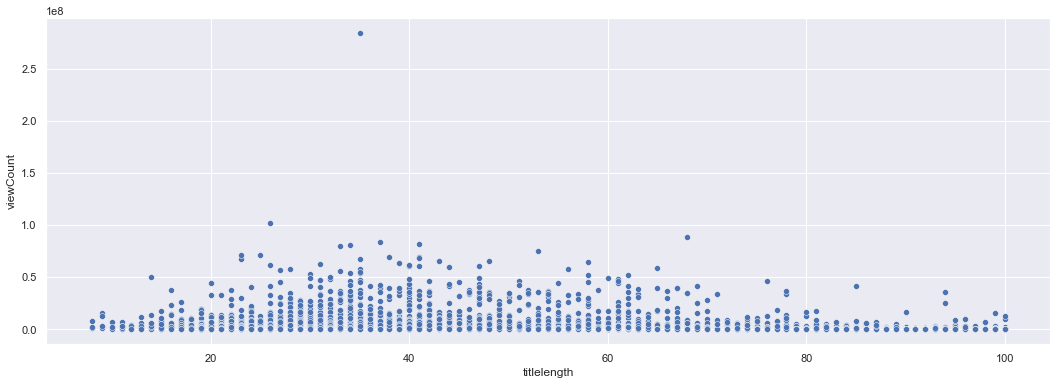

In [41]:
sns.scatterplot(data = video_df, x = "titlelength", y = "viewCount")

## Wordcloud for words in title
#### As I'm interested to see what the creators are making videos about and which terms most frquently appear in their video titles, I will create a wordcloud for the most common words. We first need to remove the stopwords such as "you", "I", "the", etc. which do note contribute a lot to the maning of the title.

In [42]:
stop_words = set(stopwords.words("english"))
video_df["title_no_stopwords"] = video_df["title"].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df["title_no_stopwords"].tolist() for a in b])
all_words_str = " ".join(all_words)

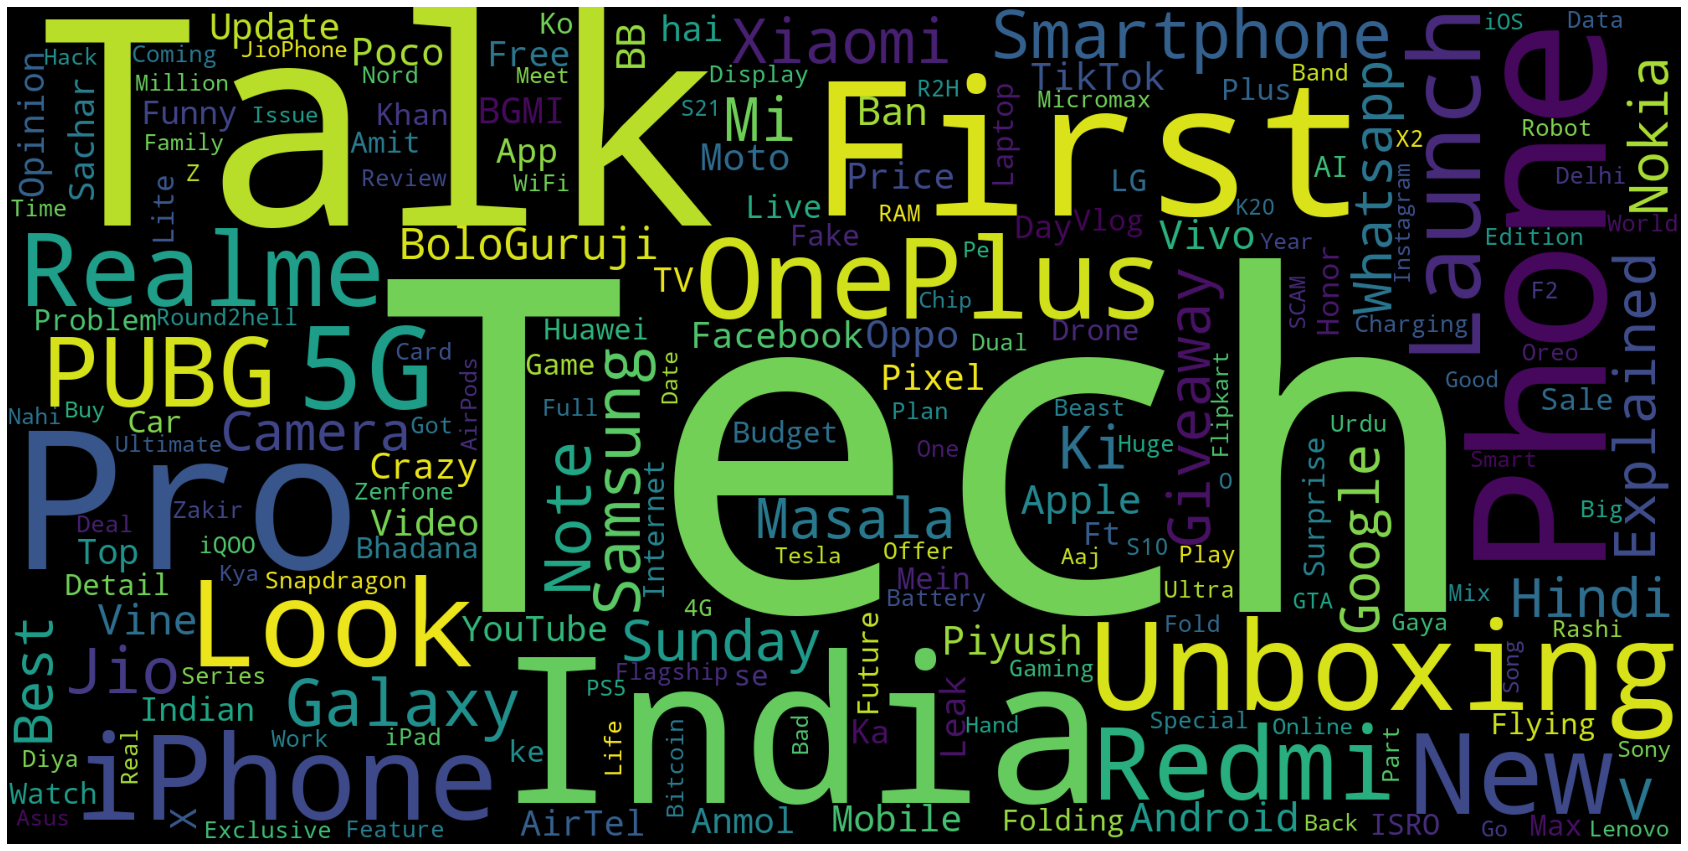

In [43]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    
wordcloud = WordCloud(width = 2000, height = 1000, random_state = 1, background_color = "black",
                     colormap= "viridis", collocations = False). generate(all_words_str)
plot_cloud(wordcloud)

#### It can be seen that most common words are respected channel owner name and topics which creater talking of.

## Number of tags vs views
#### It seems that most videos have between 5 and 30 tags. The relationship between number of tags and view count is not clearly seen, but too few tags or too many tags do seem to correlatte with fewer views.

<AxesSubplot:xlabel='tagsCount', ylabel='viewCount'>

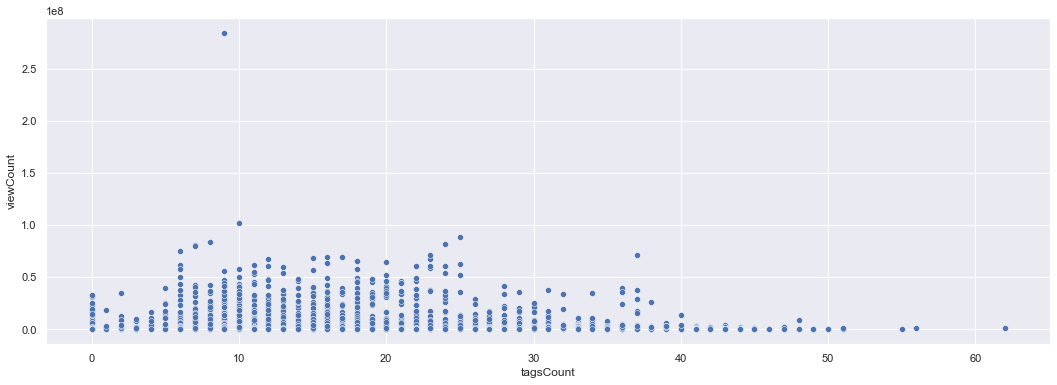

In [44]:
sns.scatterplot(data = video_df, x = "tagsCount", y = "viewCount")

## Which day in the week are most videos uploaded?
#### It's interesting to see that more videos are uploaded in the middle of the week but most of the videos uploaded on Mondays and Fridays. 

#### This is because of the niche that more geared towards entertainment can be watched with the weekends. But it also means most of the creators work on weekends and upload them beginning of the week or Friday.

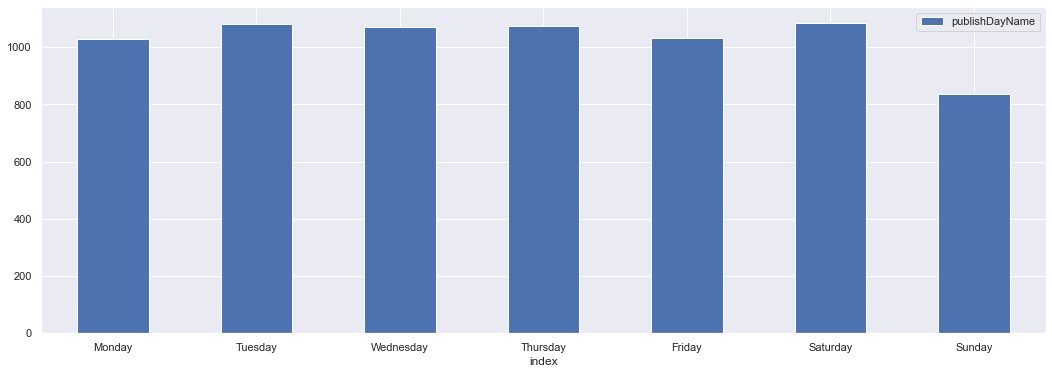

In [45]:
day_df = pd.DataFrame(video_df["publishDayName"].value_counts())
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x="index", y = "publishDayName", rot = 0)

## Wordcloud for video comments
#### We can see what are the frequently-mentioned words in the video comments. I will do this by visualizing the keywords in a wordcloud.

In [46]:
stop_words = set(stopwords.words("english"))
comments_df["comments_no_stopwords"] = comments_df["comments"].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words_c = list([a for b in comments_df["comments_no_stopwords"].tolist() for a in b])
all_words_str_c = " ".join(all_words)

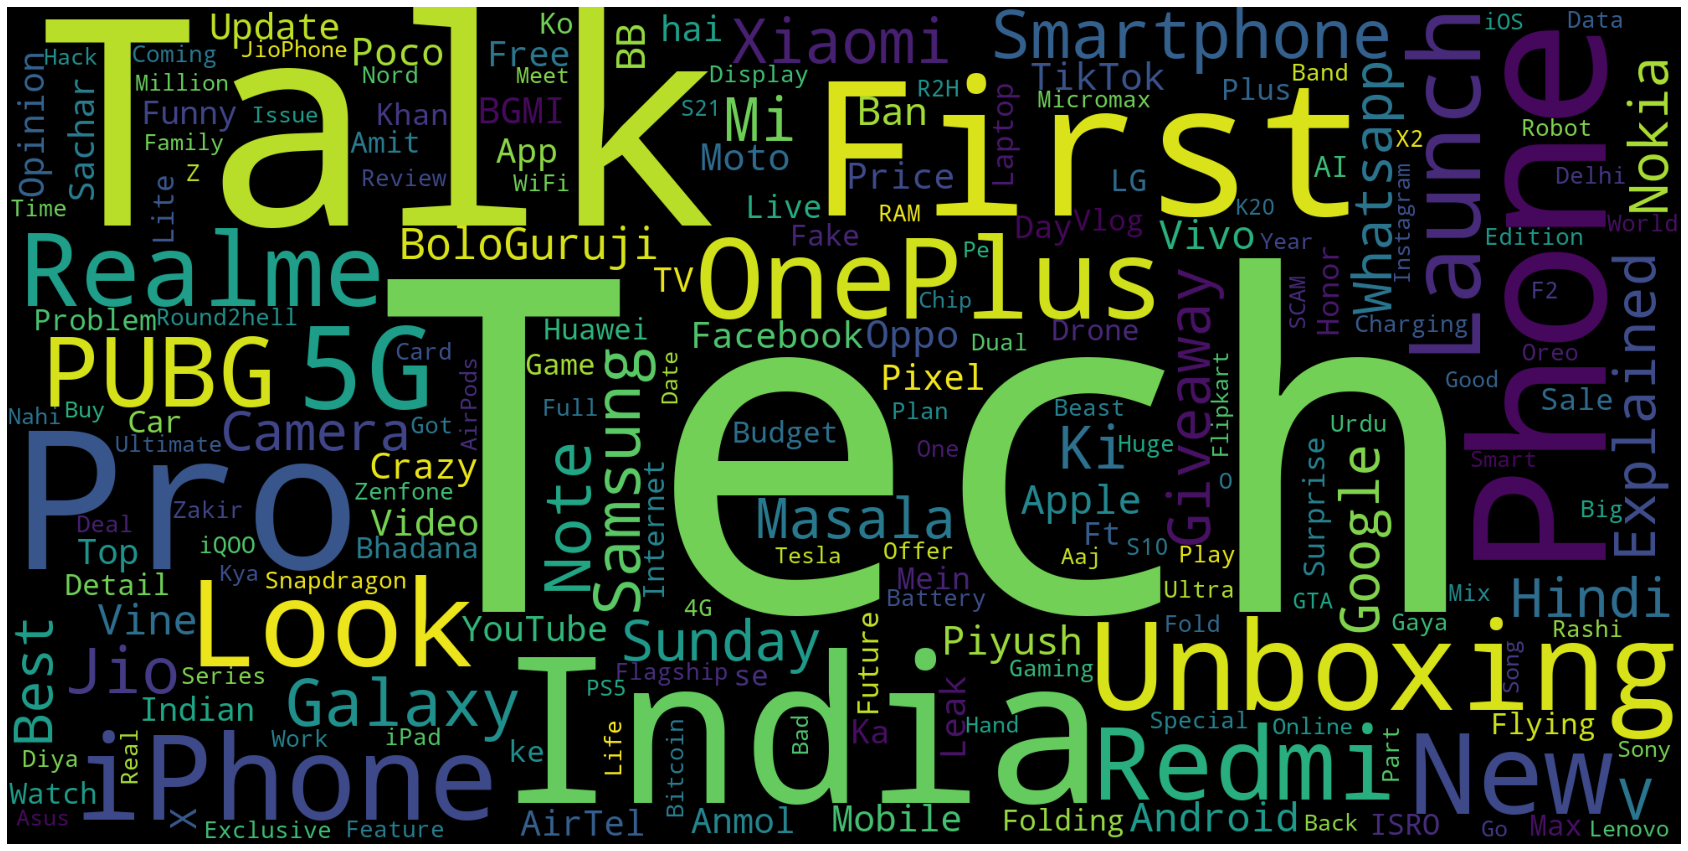

In [47]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state = 1, background_color = "black",
                     colormap= "viridis", collocations = False). generate(all_words_str_c)
plot_cloud(wordcloud)

 #### We can see that next to the obvious words such as 'video', the most frequent words are quite positive and less negatives

## Conclusion and future research ideas
### In this project, we have explored the video data of the 10 most Indian popular Entertaining channels and revealed many interesting findings for anyone who are starting out with a Youtube channel in and planning to create entertaining content.

   #### The more likes and comments a video has, the more views the video gets (it is not gauranteed that this a casual            relationship, it is simply a correlation and we can work both way). 
   
   #### Likes seem to be a better indicator for interaction than comments and the numebr of likes seem to follow the "social proof", which means the more views the video has, the more people will like it.
    
   #### Most videos have between 5 and 30 tags.
    
   #### Most-viewed videos tend to have average title length of 30-70 characters. Too short or too long titles seem to harm         viewership.
    
   #### Videos are usually uploaded on middle of the weekdays and less on weekends and starting of the week.
    
   #### Comments on videos are generally positive.
    

## Project Findings

### The findings should also be taken with a grain of salt for a number of reasons:
    
   #### The number of videos is quite small.
    
   #### have only considered the first 10 comments on each video, which might not be representative for all comments.
    
   #### There are many other factors that haven't been taken into the analysis, including tthe marketing strategy of the          creators and many random effects that would affect how successful a video is.

## Ideas for future research

### To Expand and build on this research project, one can:

   ##### Expand the dataset to also smaller channels in data science niche
    
   ##### Do sentiment analysis on the comments and find out wich videos get more positive comments and which videos get less positive comments
    
   ##### Conduct this research for other vlogs or other variaty of channels, to compare different trends with each other to see the different patterns in viewship and video characterstics.